Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

## Exercise 3-1

Read the female respondent file.

In [1]:
%matplotlib inline

import chap01soln
resp = chap01soln.ReadFemResp()

In [19]:
import thinkplot as tp
from thinkstats2 import Pmf, Mean

Make a PMF of <tt>numkdhh</tt>, the number of children under 18 in the respondent's household.

In [20]:
pmf = Pmf(resp['numkdhh'], label='unbiased PMF')

Display the PMF.

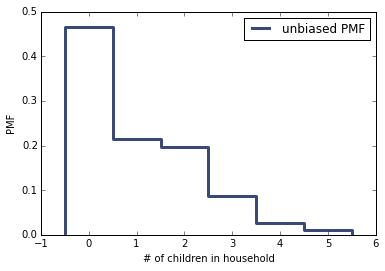

In [21]:
tp.Pmfs([pmf])
tp.Show(xlabel='# of children in household', ylabel='PMF')

Define <tt>BiasPmf</tt>.

In [22]:
def BiasPmf(pmf, label=''):
    """Returns the Pmf with oversampling proportional to value.

    If pmf is the distribution of true values, the result is the
    distribution that would be seen if values are oversampled in
    proportion to their values; for example, if you ask students
    how big their classes are, large classes are oversampled in
    proportion to their size.

    Args:
      pmf: Pmf object.
      label: string label for the new Pmf.

     Returns:
       Pmf object
    """
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

Make a the biased Pmf of children in the household, as observed if you surveyed the children instead of the respondents.

In [23]:
biased_pmf = BiasPmf(pmf, label='biased PMF')

Display the actual Pmf and the biased Pmf on the same axes.

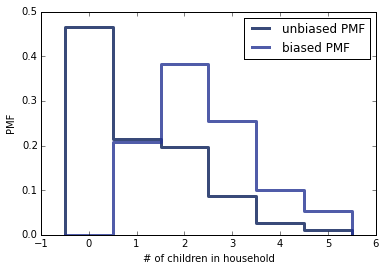

In [24]:
tp.Pmfs([pmf, biased_pmf])
tp.Show(xlabel='# of children in household', ylabel='PMF')

Compute the means of the two Pmfs.

In [26]:
print('Unbiased PMF mean: ', pmf.Mean())
print('Biased PMF mean: ', biased_pmf.Mean())

('Unbiased PMF mean: ', 1.0242051550438309)
('Biased PMF mean: ', 2.4036791006642821)


## Exercise 3-2

Write code for `PmfMean` and `PmfVar`.

In [27]:
pmf.Items()

[(0, 0.46617820227659301),
 (1, 0.21405207379301322),
 (2, 0.19625801386889966),
 (3, 0.087138558157791451),
 (4, 0.025644380478869556),
 (5, 0.010728771424833181)]

In [33]:
def PmfMean(pmf):
    """Return the mean value of the distribution represented by 
    the PMF in pmf.
    """
    return sum([ prob*item for item, prob in pmf.Items() ])

def PmfVar(pmf):
    """Return the variance of the distribution represented by 
    the PMF in pmf.
    """
    mean = PmfMean(pmf)
    return sum( [ prob*(item - mean)**2 for item, prob in pmf.Items() ])

In [32]:
# check by comparing to the built-in methods
print('PmfMean: {}, pmf.Mean: {}'.format(PmfMean(pmf), pmf.Mean()))
print('PmfVar: {}, pmf.Var: {}'.format(PmfVar(pmf), pmf.Var()))

PmfMean: 1.02420515504, pmf.Mean: 1.02420515504
PmfVar: 1.41286432635, pmf.Var: 1.41286432635


## Exercise 3-3

"Are first babies more likely to be late?" Calculate using respondents who have at least two babies, and compute pair-wise differences."

In [3]:
import nsfg

In [4]:
preg = nsfg.ReadFemPreg()

nsfg.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.birthwgt_lb[df.birthwgt_lb > 20] = np.nan


In [5]:
# subset on successful pregnanices
live = preg[ preg['outcome'] == 1 ]

In [6]:
# create mapping between caseid and list of indices into live df
livemap = nsfg.MakePregMap(live)

In [7]:
# keep track of the differences
diffs = []

# loop over id, [indices] 
for caseid, idxs in livemap.items():
    if len(idxs) >= 2:
        # at least 2 pregnancies
        # use the indices into the live array and get the 'prglngth' values
        durations = live.loc[idxs]['prglngth'].values
        # need first v rest
        first_dur = durations[0]
        rest_dur = durations[1:]
        # calc difference between first and rest
        diffs.extend([first_dur - x for x in rest_dur])    

In [22]:
mean_diff = Mean(diffs)
print('Mean difference between first and rest of pregnancies (weeks): ', mean_diff)

('Mean difference between first and rest of pregnancies (weeks): ', 0.085955649419218585)


/Users/jmontague/.virtualenvs/data-2.7-tw/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


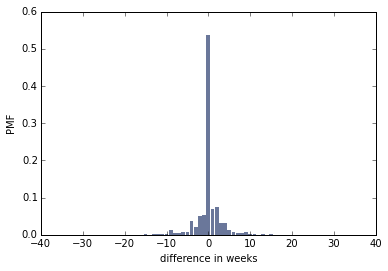

In [23]:
pmf = Pmf(diffs)
#tp.Pmfs([pmf])
tp.Hist(pmf)
tp.Show(xlabel='difference in weeks', ylabel='PMF')

## Exercise 3-4

Review ``relay_soln.py``.
